# **Module 4: Spatial Dependence and Regression**
## **Prerequisites**
### Data
For this workshop, a pseudo dataset representing hypothetical pest stress for selected Minnesota counties are created and saved in the directory `./data/shp/mnp`.
### Software
To execute the code you will need a `conda` environment for Python with the packages imported below.

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from pysal.lib import weights
from spreg import ML_Error_Regimes, ML_Lag, ML_Error, OLS
from splot.libpysal import plot_spatial_weights
import esda 
from splot.esda import plot_moran

## **Read and visualize input data**

In [2]:
mnp = gpd.read_file("./data/shp/mnp/mnp.shp")
print ("Coordinate reference system is {}".format(mnp.crs))
print ("Number of records is {}".format(len(mnp)))
mnp.head()

Coordinate reference system is epsg:26915
Number of records is 41


,COUNTYFIPS,COUNTYNAME,HOST,PEST,geometry
0,013,Blue Earth,7.070996,101.373005,"POLYGON ((390506.856 4902151.077, 390511.850 4..."
1,015,Brown,5.333409,87.899395,"POLYGON ((358342.018 4924074.276, 358342.521 4..."
2,019,Carver,5.926490,45.360617,"POLYGON ((439502.612 4980761.193, 439476.618 4..."
3,023,Chippewa,5.664981,74.068789,"POLYGON ((323409.909 5002337.605, 323356.939 5..."
4,033,Cottonwood,5.659359,90.921421,"POLYGON ((303222.915 4896582.925, 304066.172 4..."


Text(0.5, 1.0, 'Minnesota Pest Pressure for selected counties')

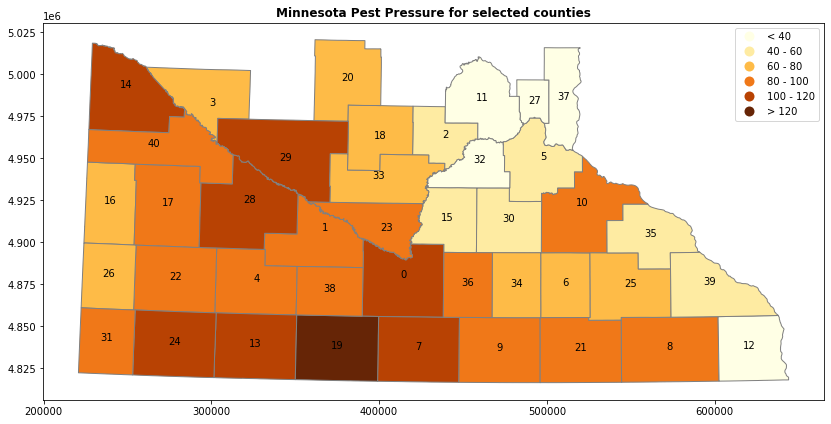

In [3]:
fig, ax = plt.subplots(figsize=(14,8))
mnp.plot(ax=ax, column="PEST", legend=True, scheme="User_Defined", cmap="YlOrBr", 
         edgecolor="grey", classification_kwds=dict(bins=[40,60,80,100,120]),
         legend_kwds={"labels": ["< 40", "40 - 60", "60 - 80", "80 - 100", "100 - 120", "> 120"]})
mnp["coords"] = mnp["geometry"].apply(lambda x: x.representative_point().coords[:])
mnp["coords"] = [coords[0] for coords in mnp["coords"]]
for idx, row in mnp.iterrows():
    ax.annotate(text=idx, xy=row["coords"],
                 horizontalalignment="center")
ax.set_title("Minnesota Pest Pressure for selected counties", weight="bold")

## **Spatial weights (contiguity and distance-based)**

### Queen's case (contiguity)

In [4]:
# calculate neighboring using Queen's case (contiguity)
mnp_nbq = weights.contiguity.Queen.from_dataframe(mnp)
# summarize 
print ("Number of units: {}".format(mnp_nbq.n))
print ("Number of nonzero weights: {}".format(mnp_nbq.nonzero))
print ("Percentage of nonzero weights: {}".format(mnp_nbq.pct_nonzero))
print ("Average number of neighbors: {}".format(mnp_nbq.mean_neighbors))
print ("Largest number of neighbors is {}".format(mnp_nbq.max_neighbors))
print ("Minimum number of neighbors is {}".format(mnp_nbq.min_neighbors))
print ("Number of units without any neighbors {}".format(len(mnp_nbq.islands)))
print ("Histogram: {}".format(mnp_nbq.histogram))
print ("Neighbour list: {}".format(mnp_nbq.neighbors))

Number of units: 41
Number of nonzero weights: 190
Percentage of nonzero weights: 11.302795954788817
Average number of neighbors: 4.634146341463414
Largest number of neighbors is 8
Minimum number of neighbors is 2
Number of units without any neighbors 0
Histogram: [(2, 4), (3, 5), (4, 11), (5, 7), (6, 11), (7, 2), (8, 1)]
Neighbour list: {0: [1, 19, 36, 23, 38, 7, 15], 1: [0, 4, 38, 23, 28, 29], 2: [32, 33, 18, 11], 3: [40, 29, 14], 4: [1, 38, 22, 24, 28, 13], 5: [32, 37, 11, 10, 27, 30], 6: [34, 21, 25, 10, 30], 7: [0, 9, 19, 36], 8: [25, 12, 21, 39], 9: [34, 36, 21, 7], 10: [35, 5, 6, 25, 30], 11: [32, 2, 27, 5], 12: [8, 39], 13: [24, 19, 4, 38], 14: [40, 3], 15: [0, 32, 33, 36, 23, 30], 16: [40, 17, 26], 17: [16, 22, 40, 26, 28], 18: [33, 2, 20, 29], 19: [0, 13, 38, 7], 20: [18, 29], 21: [34, 6, 8, 25, 9], 22: [17, 4, 24, 26, 28, 31], 23: [0, 1, 33, 29, 15], 24: [4, 13, 22, 31], 25: [35, 21, 6, 39, 8, 10], 26: [16, 17, 22, 31], 27: [11, 37, 5], 28: [1, 17, 4, 22, 40, 29], 29: [1, 33

### Rook's case (contiguity)

In [5]:
# calculate neighboring using Rook's case (contiguity)
mnp_nbr = weights.contiguity.Rook.from_dataframe(mnp)
# summarize 
print ("Number of units: {}".format(mnp_nbr.n))
print ("Number of nonzero weights: {}".format(mnp_nbr.nonzero))
print ("Percentage of nonzero weights: {}".format(mnp_nbr.pct_nonzero))
print ("Average number of neighbors: {}".format(mnp_nbr.mean_neighbors))
print ("Largest number of neighbors is {}".format(mnp_nbr.max_neighbors))
print ("Minimum number of neighbors is {}".format(mnp_nbr.min_neighbors))
print ("Number of units without any neighbors {}".format(len(mnp_nbr.islands)))
print ("Histogram: {}".format(mnp_nbr.histogram))
print ("Neighbour list: {}".format(mnp_nbr.neighbors))

Number of units: 41
Number of nonzero weights: 190
Percentage of nonzero weights: 11.302795954788817
Average number of neighbors: 4.634146341463414
Largest number of neighbors is 8
Minimum number of neighbors is 2
Number of units without any neighbors 0
Histogram: [(2, 4), (3, 5), (4, 11), (5, 7), (6, 11), (7, 2), (8, 1)]
Neighbour list: {0: [1, 19, 36, 23, 38, 7, 15], 1: [0, 4, 38, 23, 28, 29], 2: [32, 33, 18, 11], 3: [40, 29, 14], 4: [1, 38, 22, 24, 28, 13], 5: [32, 37, 27, 10, 11, 30], 6: [34, 21, 25, 10, 30], 7: [0, 9, 19, 36], 8: [25, 12, 21, 39], 9: [34, 36, 21, 7], 10: [35, 5, 6, 25, 30], 11: [32, 2, 27, 5], 12: [8, 39], 13: [24, 19, 4, 38], 14: [40, 3], 15: [0, 33, 32, 36, 23, 30], 16: [40, 17, 26], 17: [16, 22, 40, 26, 28], 18: [33, 2, 20, 29], 19: [0, 13, 38, 7], 20: [18, 29], 21: [34, 6, 8, 9, 25], 22: [17, 4, 24, 26, 28, 31], 23: [0, 1, 33, 29, 15], 24: [4, 13, 22, 31], 25: [35, 21, 6, 39, 8, 10], 26: [16, 17, 22, 31], 27: [11, 37, 5], 28: [1, 17, 4, 22, 40, 29], 29: [1, 33

### K-nearest neighbors (distance-based)

In [6]:
# calculate neighboring using K-nearest neighbors (distance-based)
mnp_nbk3 = weights.distance.KNN.from_dataframe(mnp, k=3)
# summarize 
print ("Number of units: {}".format(mnp_nbk3.n))
print ("Number of nonzero weights: {}".format(mnp_nbk3.nonzero))
print ("Percentage of nonzero weights: {}".format(mnp_nbk3.pct_nonzero))
print ("Average number of neighbors: {}".format(mnp_nbk3.mean_neighbors))
print ("Largest number of neighbors is {}".format(mnp_nbk3.max_neighbors))
print ("Minimum number of neighbors is {}".format(mnp_nbk3.min_neighbors))
print ("Number of units without any neighbors {}".format(len(mnp_nbk3.islands)))
print ("Histogram: {}".format(mnp_nbk3.histogram))
print ("Neighbour list: {}".format(mnp_nbk3.neighbors))

Number of units: 41
Number of nonzero weights: 123
Percentage of nonzero weights: 7.317073170731708
Average number of neighbors: 3.0
Largest number of neighbors is 3
Minimum number of neighbors is 3
Number of units without any neighbors 0
Histogram: [(3, 41)]
Neighbour list: {0: [23, 36, 7], 1: [38, 23, 4], 2: [32, 11, 18], 3: [40, 14, 29], 4: [13, 28, 1], 5: [32, 27, 30], 6: [34, 25, 21], 7: [0, 9, 36], 8: [39, 25, 12], 9: [34, 36, 21], 10: [5, 35, 6], 11: [27, 2, 32], 12: [39, 8, 25], 13: [4, 24, 19], 14: [40, 3, 16], 15: [32, 30, 36], 16: [17, 26, 40], 17: [40, 16, 22], 18: [33, 2, 20], 19: [38, 13, 7], 20: [18, 29, 33], 21: [6, 25, 9], 22: [24, 26, 17], 23: [33, 0, 1], 24: [22, 31, 13], 25: [35, 6, 8], 26: [31, 22, 16], 27: [37, 11, 5], 28: [29, 4, 1], 29: [28, 18, 20], 30: [15, 34, 32], 31: [26, 24, 22], 32: [2, 15, 5], 33: [23, 18, 2], 34: [36, 6, 30], 35: [25, 10, 39], 36: [34, 0, 15], 37: [27, 5, 11], 38: [1, 19, 0], 39: [12, 8, 35], 40: [17, 14, 3]}


### Distance (distance-based)

In [7]:
# calculate neighboring by distance (distance-based)
mnp_nbd = weights.distance.DistanceBand.from_dataframe(mnp, 100000, binary=True)
# summarize 
print ("Number of units: {}".format(mnp_nbd.n))
print ("Number of nonzero weights: {}".format(mnp_nbd.nonzero))
print ("Percentage of nonzero weights: {}".format(mnp_nbd.pct_nonzero))
print ("Average number of neighbors: {}".format(mnp_nbd.mean_neighbors))
print ("Largest number of neighbors is {}".format(mnp_nbd.max_neighbors))
print ("Minimum number of neighbors is {}".format(mnp_nbd.min_neighbors))
print ("Number of units without any neighbors {}".format(len(mnp_nbd.islands)))
print ("Histogram: {}".format(mnp_nbd.histogram))
print ("Neighbour list: {}".format(mnp_nbd.neighbors))

Number of units: 41
Number of nonzero weights: 518
Percentage of nonzero weights: 30.814991076740036
Average number of neighbors: 12.634146341463415
Largest number of neighbors is 20
Minimum number of neighbors is 4
Number of units without any neighbors 0
Histogram: [(4, 1), (5, 1), (6, 0), (7, 3), (8, 1), (9, 4), (10, 3), (11, 5), (12, 4), (13, 2), (14, 0), (15, 4), (16, 4), (17, 4), (18, 3), (19, 1), (20, 1)]
Neighbour list: {0: [1, 2, 4, 6, 7, 9, 13, 15, 18, 19, 23, 30, 32, 33, 34, 36, 38], 1: [0, 2, 4, 7, 13, 15, 17, 18, 19, 20, 22, 23, 28, 29, 33, 36, 38], 2: [0, 1, 5, 10, 11, 15, 18, 20, 23, 27, 29, 30, 32, 33, 34, 36, 37], 3: [14, 16, 17, 20, 28, 29, 40], 4: [0, 1, 13, 16, 17, 19, 22, 23, 24, 26, 28, 29, 31, 33, 38, 40], 5: [2, 6, 10, 11, 15, 18, 25, 27, 30, 32, 33, 34, 35, 36, 37], 6: [0, 5, 7, 8, 9, 10, 15, 21, 25, 30, 32, 34, 35, 36, 39], 7: [0, 1, 6, 9, 13, 15, 19, 21, 23, 30, 34, 36, 38], 8: [6, 10, 12, 21, 25, 34, 35, 39], 9: [0, 6, 7, 10, 15, 19, 21, 25, 30, 34, 36], 10: 

### Visualize and compare weights networks

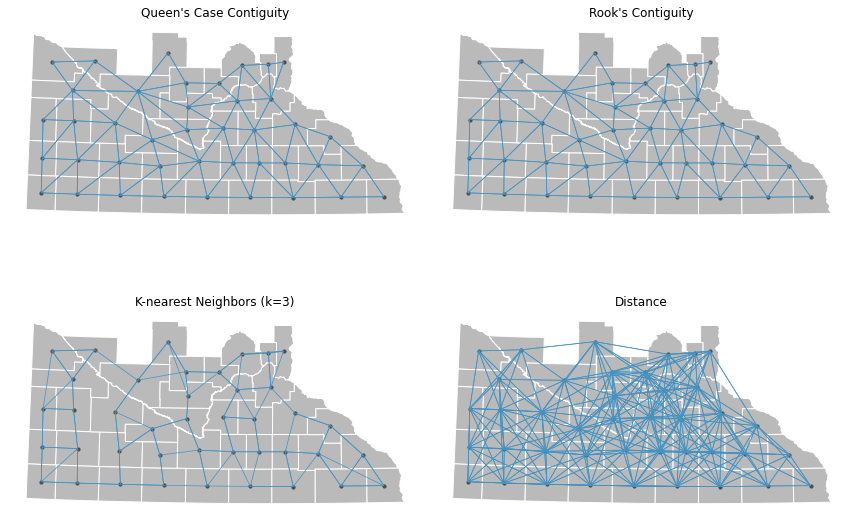

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
plot_spatial_weights(mnp_nbq, mnp, ax=axs[0, 0])
axs[0, 0].set_title("Queen's Case Contiguity")
plot_spatial_weights(mnp_nbr, mnp, ax=axs[0, 1])
axs[0, 1].set_title("Rook's Contiguity")
plot_spatial_weights(mnp_nbk3, mnp, ax=axs[1, 0])
axs[1, 0].set_title("K-nearest Neighbors (k=3)")
plot_spatial_weights(mnp_nbd, mnp, ax=axs[1, 1])
axs[1, 1].set_title("Distance")
plt.tight_layout()

### Spatial weights transformation and weights summary

In [9]:
# Spatial Weights Summary - Row Standardized
mnp_nbq.set_transform("R")
mnp_nbq_lw_r = mnp_nbq.to_adjlist()
print ("Property s0 = {}".format(mnp_nbq.s0))
print ("Property s1 = {}".format(mnp_nbq.s1))
print ("Property s2 = {}".format(mnp_nbq.s2))
print ("Weights: {}".format(mnp_nbq.weights))
print ("Weights summary: ")
print (mnp_nbq_lw_r["weight"].describe())

Property s0 = 41.0
Property s1 = 19.071785714285713
Property s2 = 168.254410430839
Weights: {0: [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285], 1: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], 2: [0.25, 0.25, 0.25, 0.25], 3: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 4: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], 5: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], 6: [0.2, 0.2, 0.2, 0.2, 0.2], 7: [0.25, 0.25, 0.25, 0.25], 8: [0.25, 0.25, 0.25, 0.25], 9: [0.25, 0.25, 0.25, 0.25], 10: [0.2, 0.2, 0.2, 0.2, 0.2], 11: [0.25, 0.25, 0.25, 0.25], 12: [0.5, 0.5], 13: [0.25, 0.25, 0.25, 0.25], 14: [0.5, 0.5], 15: [0.16666666666666666, 0.

In [10]:
# Spatial Weights Summary - Binary
mnp_nbq.set_transform("B")
mnp_nbq_lw_b = mnp_nbq.to_adjlist()
print ("Property s0 = {}".format(mnp_nbq.s0))
print ("Property s1 = {}".format(mnp_nbq.s1))
print ("Property s2 = {}".format(mnp_nbq.s2))
print ("Weights: {}".format(mnp_nbq.weights))
print ("Weights summary: ")
print (mnp_nbq_lw_b["weight"].describe())

Property s0 = 190.0
Property s1 = 380.0
Property s2 = 3880.0
Weights: {0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 2: [1.0, 1.0, 1.0, 1.0], 3: [1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 6: [1.0, 1.0, 1.0, 1.0, 1.0], 7: [1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0], 9: [1.0, 1.0, 1.0, 1.0], 10: [1.0, 1.0, 1.0, 1.0, 1.0], 11: [1.0, 1.0, 1.0, 1.0], 12: [1.0, 1.0], 13: [1.0, 1.0, 1.0, 1.0], 14: [1.0, 1.0], 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0], 17: [1.0, 1.0, 1.0, 1.0, 1.0], 18: [1.0, 1.0, 1.0, 1.0], 19: [1.0, 1.0, 1.0, 1.0], 20: [1.0, 1.0], 21: [1.0, 1.0, 1.0, 1.0, 1.0], 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 23: [1.0, 1.0, 1.0, 1.0, 1.0], 24: [1.0, 1.0, 1.0, 1.0], 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 26: [1.0, 1.0, 1.0, 1.0], 27: [1.0, 1.0, 1.0], 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 30: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 31: [1.0, 1.0, 1.0], 32: [1.0, 1.

## **Spatial Autocorrelation with Moran’s I Global Statistic**

In [11]:
mi = esda.moran.Moran(mnp["PEST"], mnp_nbq)
print("Moran's I statistic: {}".format(mi.I))
print("p-value of I under randomization assumption: {}".format(mi.p_rand))
print ("variance of I under randomization assumption: {}".format(mi.VI_rand))
print ("Expected value under normality assumption: {}".format(mi.EI))

Moran's I statistic: 0.5568801870858666
p-value of I under randomization assumption: 9.143259704913476e-09
variance of I under randomization assumption: 0.010255357545581037
Expected value under normality assumption: -0.025


### Visualize Moran's I plot

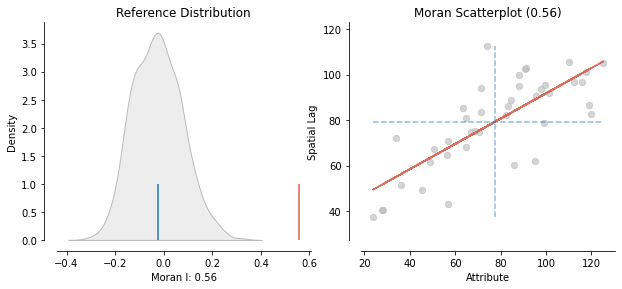

In [12]:
plot_moran(mi, zstandard=False, figsize=(10,4))
plt.show()

## **Spatial Regression Models**

### ML estimation of the spatial lag model

In [13]:
y = mnp["PEST"].to_numpy()
x = np.expand_dims(mnp["HOST"].to_numpy(), axis=1)
mnp_slm = ML_Lag(y, x, mnp_nbq, name_w="Queen's Case", name_x=["HOST"], name_y="PEST", 
                 name_ds="MN Pest Pressure")
print ("Estimate of spatial autoregressive coefficient rho: {}".format(mnp_slm.rho))
print(mnp_slm.summary)

Estimate of spatial autoregressive coefficient rho: 0.7292914348910695
REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :MN Pest Pressure
Weights matrix      :Queen's Case
Dependent Variable  :        PEST                Number of Observations:          41
Mean dependent var  :     77.6361                Number of Variables   :           3
S.D. dependent var  :     27.6551                Degrees of Freedom    :          38
Pseudo R-squared    :      0.6165
Spatial Pseudo R-squared:  0.2203
Sigma-square ML     :     300.256                Log likelihood        :    -178.497
S.E of regression   :      17.328                Akaike info criterion :     362.995
                                                 Schwarz criterion     :     368.136

------------------------------------------------------------------------------------
            Variable     Coefficient   

C:\Users\olena\miniconda3\envs\geo\lib\site-packages\scipy\optimize\_minimize.py:870: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


### ML estimation of the spatial error model

In [14]:
mnp_sem = ML_Error(y, x, mnp_nbq, name_w="Queen's Case", name_x=["HOST"], name_y="PEST", 
                   name_ds="MN Pest Pressure")
print(mnp_sem.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :MN Pest Pressure
Weights matrix      :Queen's Case
Dependent Variable  :        PEST                Number of Observations:          41
Mean dependent var  :     77.6361                Number of Variables   :           2
S.D. dependent var  :     27.6551                Degrees of Freedom    :          39
Pseudo R-squared    :      0.1655
Sigma-square ML     :     294.874                Log likelihood        :    -178.539
S.E of regression   :      17.172                Akaike info criterion :     361.078
                                                 Schwarz criterion     :     364.505

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------

### Spatial Durbin model
Although some models are not directly offered by PySal APIs, they can be derived from existing standard models. For example, a spatial Durbin model can be estimated by computing a spatial lag of  independent variables and then adding the set of lagged variables to the original independent variables to run a spatial lag model.  

In [15]:
lag_x = weights.lag_spatial(mnp_nbq, x)
new_x = np.hstack((x,lag_x))
mnp_sdm = ML_Lag(y, new_x, mnp_nbq, name_w="Queen's Case", name_x=["HOST"], name_y="PEST", 
                 name_ds="MN Pest Pressure")
print ("Estimate of spatial autoregressive coefficient rho: {}".format(mnp_sdm.rho))
print(mnp_sdm.summary)

Estimate of spatial autoregressive coefficient rho: 0.747514956528494
REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :MN Pest Pressure
Weights matrix      :Queen's Case
Dependent Variable  :        PEST                Number of Observations:          41
Mean dependent var  :     77.6361                Number of Variables   :           4
S.D. dependent var  :     27.6551                Degrees of Freedom    :          37
Pseudo R-squared    :      0.6265
Spatial Pseudo R-squared:  0.2139
Sigma-square ML     :     295.218                Log likelihood        :    -178.385
S.E of regression   :      17.182                Akaike info criterion :     364.770
                                                 Schwarz criterion     :     371.624

------------------------------------------------------------------------------------
            Variable     Coefficient    

### Ordinary least squares model

In [16]:
mnp_ols = OLS(y, x, mnp_nbq, name_w="Queen's Case", name_x=["HOST"], name_y="PEST", 
                 name_ds="MN Pest Pressure", spat_diag=True)
print(mnp_ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :MN Pest Pressure
Weights matrix      :Queen's Case
Dependent Variable  :        PEST                Number of Observations:          41
Mean dependent var  :     77.6361                Number of Variables   :           2
S.D. dependent var  :     27.6551                Degrees of Freedom    :          39
R-squared           :      0.1655
Adjusted R-squared  :      0.1441
Sum squared residual:   25527.920                F-statistic           :      7.7368
Sigma-square        :     654.562                Prob(F-statistic)     :    0.008292
S.E. of regression  :      25.584                Log likelihood        :    -190.073
Sigma-square ML     :     622.632                Akaike info criterion :     384.145
S.E of regression ML:     24.9526                Schwarz criterion     :     387.572

-------------------------------------------------------------------------

#### Moran's I test on ordinary least squares model residuals

In [17]:
mi_ols = esda.moran.Moran(mnp_ols.u, mnp_nbq)
print("Moran's I statistic: {}".format(mi_ols.I))
print("p-value of I under randomization assumption: {}".format(mi_ols.p_rand))
print ("variance of I under randomization assumption: {}".format(mi_ols.VI_rand))
print ("Expected value under normality assumption: {}".format(mi_ols.EI))

Moran's I statistic: 0.5218550011069569
p-value of I under randomization assumption: 5.9363431947900835e-08
variance of I under randomization assumption: 0.010177294392728933
Expected value under normality assumption: -0.025


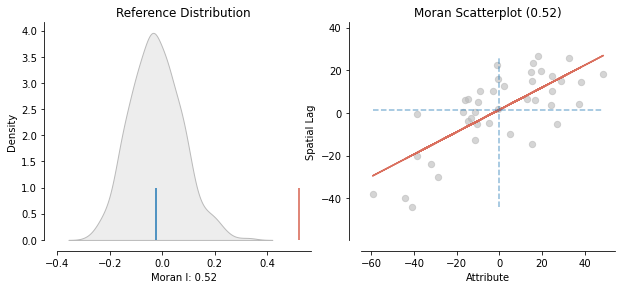

In [18]:
plot_moran(mi_ols, zstandard=False, figsize=(10,4))
plt.show()